In [30]:
source('/home/akananth/Misc/Research-Jam-2023/effect_estimate_helper.R')

In [2]:
df = fread('data/final_samples/final_regression_data.tsv', sep='\t')
nrow(df)

[1] 16893013

In [3]:
cn = 'controversy'
df$category2 <- ifelse(df$controversiality==1, 'Yes', 'No')
table(df$category2)


      No      Yes 
16674114   218899 

# Overall Comparison

In [156]:
library(MatchIt)

In [ ]:
m.out0 <- matchit(controversiality ~ num_tokens + parent_num_tokens +
                  scale(created_utc) + scale(wait_time) + depth + max_depth + score, 
                  data = df, caliper = 0.25)

In [174]:
summary(m.out0)


Call:
matchit(formula = controversiality ~ num_tokens + parent_num_tokens + 
    scale(created_utc) + scale(wait_time) + depth + max_depth + 
    score, data = df, caliper = 0.25)

Summary of Balance for All Data:
                   Means Treated Means Control Std. Mean Diff. Var. Ratio
distance                  0.0311        0.0127          0.5764     3.1743
num_tokens                0.1726       -0.0023          0.1701     1.0581
parent_num_tokens         0.1283       -0.0017          0.1278     1.0345
scale(created_utc)        0.0868       -0.0011          0.0859     1.0493
scale(wait_time)         -0.1595        0.0021         -0.2255     0.5105
depth                     3.2384        6.5739         -1.4990     0.0988
max_depth                 9.3362       12.2953         -0.5578     0.2304
score                     0.1770        1.7354         -0.5462     1.5296
                   eCDF Mean eCDF Max
distance              0.2854   0.4065
num_tokens            0.0238   0.1381
paren

In [175]:
m.data <- match.data(m.out0)


In [176]:
m.data$style <- m.data$num_markers
m.data$parent_style <- m.data$parent_num_markers
m.data$category <- m.data$controversiality
mod <- lmer(mixed_mod_equation_cat, m.data)
summary(mod)

m.data$category <- 1 - m.data$controversiality
mod2 <- lmer(mixed_mod_equation_cat, m.data)
summary(mod2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: mixed_mod_equation_cat
   Data: m.data

REML criterion at convergence: -234778.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-39.776  -0.309   0.000   0.334  13.612 

Random effects:
 Groups       Name        Variance Std.Dev.
 subreddit_re (Intercept) 0.002379 0.04877 
 Residual                 0.033536 0.18313 
Number of obs: 437798, groups:  subreddit_re, 18164

Fixed effects:
                        Estimate Std. Error         df  t value Pr(>|t|)    
(Intercept)           -4.545e-03  8.075e-04  1.506e+04   -5.629 1.85e-08 ***
parent_style           1.549e-01  1.557e-03  4.378e+05   99.516  < 2e-16 ***
category              -1.745e-03  6.408e-04  3.586e+05   -2.723  0.00646 ** 
num_tokens             9.752e-01  2.588e-04  4.378e+05 3767.476  < 2e-16 ***
parent_num_tokens     -1.382e-01  1.528e-03  4.378e+05  -90.437  < 2e-16 ***
depth                  1.136e-03  1.255e-04

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: mixed_mod_equation_cat
   Data: m.data

REML criterion at convergence: -234778.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-39.776  -0.309   0.000   0.334  13.612 

Random effects:
 Groups       Name        Variance Std.Dev.
 subreddit_re (Intercept) 0.002379 0.04877 
 Residual                 0.033536 0.18313 
Number of obs: 437798, groups:  subreddit_re, 18164

Fixed effects:
                        Estimate Std. Error         df  t value Pr(>|t|)    
(Intercept)           -6.290e-03  8.529e-04  1.507e+04   -7.375 1.73e-13 ***
parent_style           1.445e-01  1.571e-03  4.378e+05   92.016  < 2e-16 ***
category               1.745e-03  6.408e-04  3.586e+05    2.723  0.00646 ** 
num_tokens             9.752e-01  2.588e-04  4.378e+05 3767.476  < 2e-16 ***
parent_num_tokens     -1.382e-01  1.528e-03  4.378e+05  -90.437  < 2e-16 ***
depth                  1.136e-03  1.255e-04

In [177]:
m.data$style <- m.data$formality
m.data$parent_style <- m.data$parent_formality
m.data$category <- m.data$controversiality
mod3 <- lmer(mixed_mod_equation_cat, m.data)
summary(mod3)

m.data$category <- 1 - m.data$controversiality
mod4 <- lmer(mixed_mod_equation_cat, m.data)
summary(mod4)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: mixed_mod_equation_cat
   Data: m.data

REML criterion at convergence: 191527.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3959 -0.7946 -0.2247  0.7348  2.8911 

Random effects:
 Groups       Name        Variance Std.Dev.
 subreddit_re (Intercept) 0.004836 0.06954 
 Residual                 0.089141 0.29856 
Number of obs: 437156, groups:  subreddit_re, 18151

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            3.750e-01  1.584e-03  5.396e+04 236.791   <2e-16 ***
parent_style           1.153e-01  2.072e-03  4.358e+05  55.673   <2e-16 ***
category               3.031e-02  1.715e-03  4.253e+05  17.667   <2e-16 ***
num_tokens             2.334e-02  4.205e-04  4.371e+05  55.506   <2e-16 ***
parent_num_tokens      6.795e-03  4.416e-04  4.371e+05  15.388   <2e-16 ***
depth                  1.710e-03  2.046e-04  4.361

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: mixed_mod_equation_cat
   Data: m.data

REML criterion at convergence: 191527.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3959 -0.7946 -0.2247  0.7348  2.8911 

Random effects:
 Groups       Name        Variance Std.Dev.
 subreddit_re (Intercept) 0.004836 0.06954 
 Residual                 0.089141 0.29856 
Number of obs: 437156, groups:  subreddit_re, 18151

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            4.053e-01  1.649e-03  5.115e+04 245.773   <2e-16 ***
parent_style           8.831e-02  2.155e-03  4.362e+05  40.972   <2e-16 ***
category              -3.031e-02  1.715e-03  4.253e+05 -17.667   <2e-16 ***
num_tokens             2.334e-02  4.205e-04  4.371e+05  55.506   <2e-16 ***
parent_num_tokens      6.795e-03  4.416e-04  4.371e+05  15.388   <2e-16 ***
depth                  1.710e-03  2.046e-04  4.361

[1] 2.423621e-06

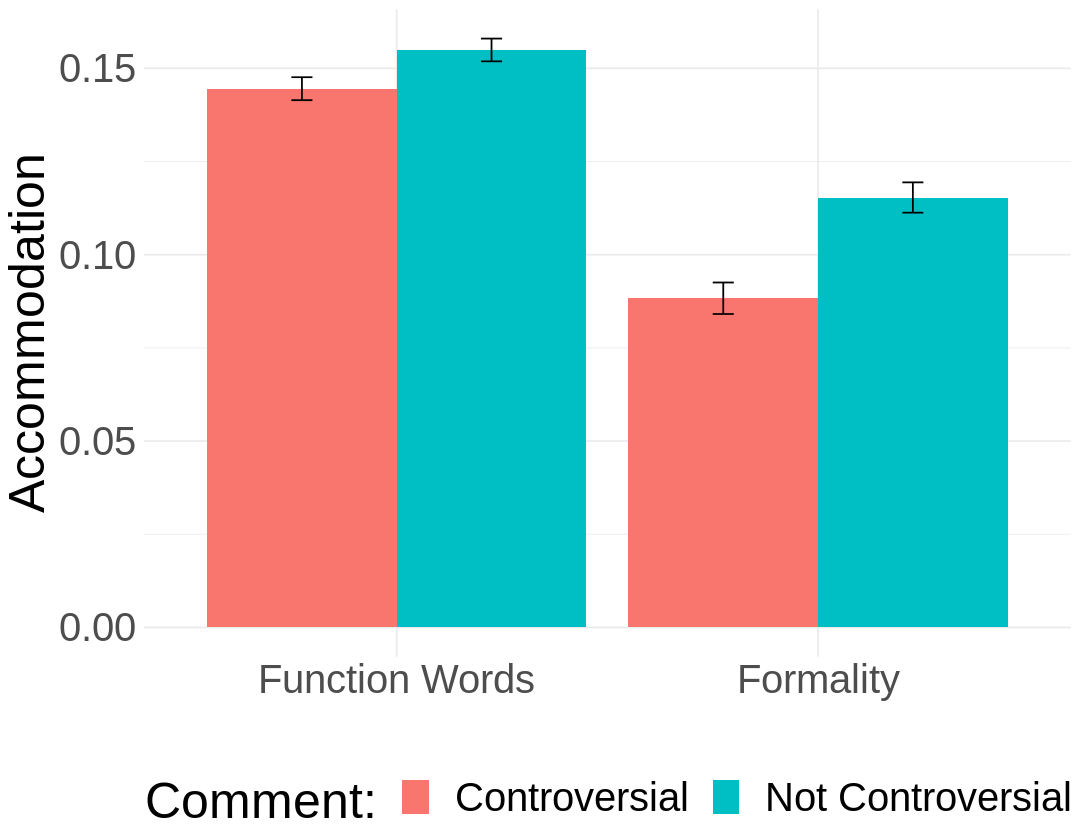

In [198]:
options(repr.plot.width = 9, repr.plot.height = 7)
data.frame(acc = c(fixef(mod)['parent_style'], fixef(mod2)['parent_style'], 
                   fixef(mod3)['parent_style'], fixef(mod4)['parent_style']),
             se = sqrt(c(vcov(mod)['parent_style','parent_style'], vcov(mod2)['parent_style','parent_style'],
                         vcov(mod3)['parent_style','parent_style'], vcov(mod4)['parent_style','parent_style'])),
             cat = c('Not Controversial','Controversial','Not Controversial','Controversial'),
             mod = c('Function Words','Function Words','Formality','Formality')) %>% 
  mutate(lo = acc - 1.96*se,
         hi = acc + 1.96*se,
         mod = factor(mod, levels = unique(mod))) %>% 
  ggplot(aes(x = mod, y = acc, ymin = lo, ymax = hi, fill = cat)) +
  geom_col(position = position_dodge(0.9)) +
  geom_errorbar(position = position_dodge(0.9), width = 0.1) +
  labs(x = '', y = 'Accommodation', fill = 'Comment:') +
  theme_minimal() +
  theme(legend.position = 'bottom',
        text = element_text(size = 30))


In [178]:
m.data$style <- m.data$num_markers
m.data$parent_style <- m.data$parent_num_markers
m.data$category <- m.data$parent_controversiality
mod5 <- lmer(mixed_mod_equation_cat, m.data)
summary(mod5)

m.data$category <- 1 - m.data$parent_controversiality
mod6 <- lmer(mixed_mod_equation_cat, m.data)
summary(mod6)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: mixed_mod_equation_cat
   Data: m.data

REML criterion at convergence: -234407

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-39.781  -0.309   0.001   0.334  13.590 

Random effects:
 Groups       Name        Variance Std.Dev.
 subreddit_re (Intercept) 0.002392 0.04891 
 Residual                 0.033562 0.18320 
Number of obs: 437798, groups:  subreddit_re, 18164

Fixed effects:
                        Estimate Std. Error         df  t value Pr(>|t|)    
(Intercept)           -4.720e-03  7.717e-04  1.201e+04   -6.116 9.89e-10 ***
parent_style           1.515e-01  1.546e-03  4.378e+05   97.948  < 2e-16 ***
category              -1.605e-03  8.473e-04  4.378e+05   -1.894   0.0582 .  
num_tokens             9.756e-01  2.581e-04  4.377e+05 3779.781  < 2e-16 ***
parent_num_tokens     -1.379e-01  1.529e-03  4.378e+05  -90.202  < 2e-16 ***
depth                  1.043e-03  1.257e-04  

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: mixed_mod_equation_cat
   Data: m.data

REML criterion at convergence: -234407

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-39.781  -0.309   0.001   0.334  13.590 

Random effects:
 Groups       Name        Variance Std.Dev.
 subreddit_re (Intercept) 0.002392 0.04891 
 Residual                 0.033562 0.18320 
Number of obs: 437798, groups:  subreddit_re, 18164

Fixed effects:
                        Estimate Std. Error         df  t value Pr(>|t|)    
(Intercept)           -6.324e-03  1.067e-03  3.626e+04   -5.927  3.1e-09 ***
parent_style           1.434e-01  1.715e-03  4.375e+05   83.615  < 2e-16 ***
category               1.605e-03  8.473e-04  4.378e+05    1.894   0.0582 .  
num_tokens             9.756e-01  2.581e-04  4.377e+05 3779.781  < 2e-16 ***
parent_num_tokens     -1.379e-01  1.529e-03  4.378e+05  -90.202  < 2e-16 ***
depth                  1.043e-03  1.257e-04  

In [179]:
m.data$style <- m.data$formality
m.data$parent_style <- m.data$parent_formality
m.data$category <- m.data$parent_controversiality
mod7 <- lmer(mixed_mod_equation_cat, m.data)
summary(mod7)

m.data$category <- 1 - m.data$parent_controversiality
mod8 <- lmer(mixed_mod_equation_cat, m.data)
summary(mod8)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: mixed_mod_equation_cat
   Data: m.data

REML criterion at convergence: 191858.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3979 -0.7949 -0.2237  0.7350  2.7765 

Random effects:
 Groups       Name        Variance Std.Dev.
 subreddit_re (Intercept) 0.005021 0.07086 
 Residual                 0.089171 0.29862 
Number of obs: 437156, groups:  subreddit_re, 18151

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            3.863e-01  1.413e-03  3.394e+04 273.355  < 2e-16 ***
parent_style           1.058e-01  1.618e-03  4.366e+05  65.393  < 2e-16 ***
category               1.656e-02  2.416e-03  4.358e+05   6.851 7.32e-12 ***
num_tokens             2.298e-02  4.200e-04  4.371e+05  54.719  < 2e-16 ***
parent_num_tokens      6.474e-03  4.412e-04  4.371e+05  14.673  < 2e-16 ***
depth                  1.789e-03  2.047e-04  4.363

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: mixed_mod_equation_cat
   Data: m.data

REML criterion at convergence: 191858.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3979 -0.7949 -0.2237  0.7350  2.7765 

Random effects:
 Groups       Name        Variance Std.Dev.
 subreddit_re (Intercept) 0.005021 0.07086 
 Residual                 0.089171 0.29862 
Number of obs: 437156, groups:  subreddit_re, 18151

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            4.028e-01  2.499e-03  1.894e+05 161.184  < 2e-16 ***
parent_style           7.933e-02  4.085e-03  4.328e+05  19.420  < 2e-16 ***
category              -1.656e-02  2.416e-03  4.358e+05  -6.851 7.32e-12 ***
num_tokens             2.298e-02  4.200e-04  4.371e+05  54.719  < 2e-16 ***
parent_num_tokens      6.474e-03  4.412e-04  4.371e+05  14.673  < 2e-16 ***
depth                  1.789e-03  2.047e-04  4.363

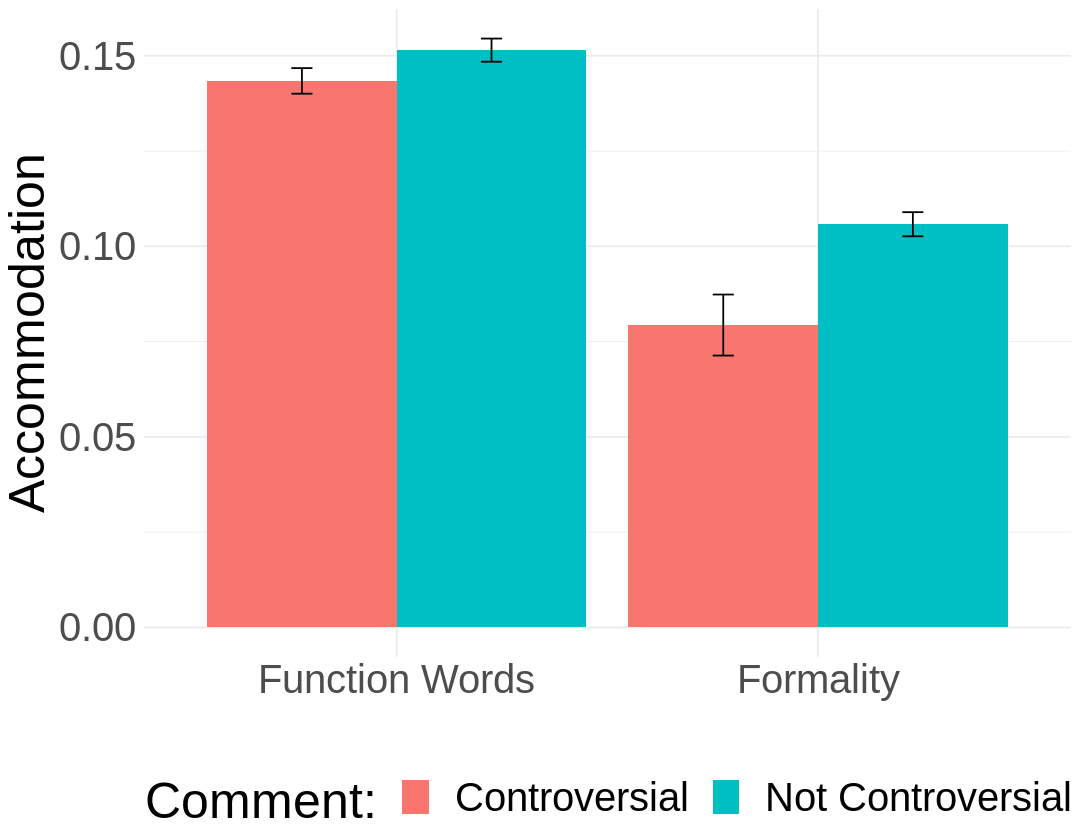

In [200]:
options(repr.plot.width = 9, repr.plot.height = 7)
data.frame(acc = c(fixef(mod5)['parent_style'], fixef(mod6)['parent_style'], 
                   fixef(mod7)['parent_style'], fixef(mod8)['parent_style']),
             se = sqrt(c(vcov(mod5)['parent_style','parent_style'], vcov(mod6)['parent_style','parent_style'],
                         vcov(mod7)['parent_style','parent_style'], vcov(mod8)['parent_style','parent_style'])),
             cat = c('Not Controversial','Controversial','Not Controversial','Controversial'),
             mod = c('Function Words','Function Words','Formality','Formality')) %>% 
  mutate(lo = acc - 1.96*se,
         hi = acc + 1.96*se,
         mod = factor(mod, levels = unique(mod))) %>% 
  ggplot(aes(x = mod, y = acc, ymin = lo, ymax = hi, fill = cat)) +
  geom_col(position = position_dodge(0.9)) +
  geom_errorbar(position = position_dodge(0.9), width = 0.1) +
  labs(x = '', y = 'Accommodation', fill = 'Comment:') +
  theme_minimal() +
  theme(legend.position = 'bottom',
        text = element_text(size = 30))


# Get Effect Data - Function Words

In [72]:
m = 'function'
df$style <- df$num_markers
df$parent_style <- df$parent_num_markers

In [31]:
bins = c(0.5/24,0.75/24,1/24,1.5/24,2/24,
          3/24,4/24,6/24,8/24,12/24,1,2,5,10)
df$category = cut(df$wait_time, c(-1,bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'time', seed = 35)



                   
                    0.0208333333333333 0.03125 0.0416666666666667  0.0625
  Controversial                   3702    6476               7206   15932
  Not Controversial             779774  847461             773179 1447952
                   
                    0.0833333333333333   0.125 0.166666666666667    0.25
  Controversial                  13429   22256             16561   24312
  Not Controversial            1083606 1558160           1062219 1443115
                   
                    0.333333333333333     0.5       1       2       5      10
  Controversial                 16268   20596   26252   17973   15352   12584
  Not Controversial            923888 1149282 1525940 1109819 1091991 1877728

Warning message:
“Model failed to converge with 1 negative eigenvalue: -5.7e+02”
Warning message:
“Model failed to converge with 1 negative eigenvalue: -6.5e+02”
Warning message:
“Model failed to converge with 1 negative eigenvalue: -4.1e+02”
boundary (singular) fit: see help('isSingular')

Warning message:
“Model failed to converge with 1 negative eigenvalue: -4.0e+03”


In [ ]:
bins = c(1:15,20,30,100)
df$category = cut(df$depth, c(-1,bins), bins)
table(df$category2, df$category, useNA='ifany')

# plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'depth', seed = 36, re_min=7,
#                                       fmla = formula('style ~ parent_style + 
#                                                         num_tokens + parent_num_tokens + (1 | subreddit_re)'),
#                                       fmla_eff = formula('style ~ parent_style * category + 
#                                                             num_tokens + parent_num_tokens + (1 | subreddit_re)'),
#                                       fmla_eff_all = formula('style ~ parent_style * category * category2 + 
#                                                                 num_tokens + parent_num_tokens + (1 | subreddit_re)'))



     
            1       2       3       4       5       6       7       8       9
  No  2202889 2218367 1771364 1624103 1572844 1232480 1063017  970589  920153
  Yes   54966   48846   33300   28974   20732   12484    7857    5527    3756
     
           10      11      12      13      14      15      20      30     100
  No   638958  458281  336647  255120  197398  156683  450690  326722  277809
  Yes     919     569     373     221     154      72     117      28       4

2023-06-07 22:56:16 1

2023-06-07 22:56:57 2

2023-06-07 22:57:32 3

2023-06-07 22:58:08 4

2023-06-07 22:58:40 5

2023-06-07 22:59:15 6

2023-06-07 22:59:45 7

2023-06-07 23:00:15 8



In [32]:
bins = sort(unique(df$score))
df$category = cut(df$score, c(-100,bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'karma', seed = 37, re_min=7)



     
           -9      -8      -7      -6      -5      -4      -3      -2      -1
  No    84492   14374   18203   23603   30821   38597   40725   87775  191713
  Yes    2317     795    1306    2227    3818    6591   11996   20175   25787
     
            0       1       2       3       4       5       6       7       8
  No   766476 8805357 4036104 1044100  328860  278282  182707  126435   92257
  Yes   52855   31628   25568   15073    7628    4105    2384    1364     830
     
            9      10      11      12
  No    68944   53651   42447  318191
  Yes     579     428     312    1133

2023-06-05 17:19:47 -9

2023-06-05 17:20:21 -8

2023-06-05 17:20:54 -7

2023-06-05 17:21:25 -6

2023-06-05 17:21:57 -5

2023-06-05 17:22:30 -4

2023-06-05 17:23:04 -3

2023-06-05 17:23:42 -2

2023-06-05 17:24:23 -1

2023-06-05 17:25:05 0

2023-06-05 17:25:47 1

2023-06-05 17:26:31 2

2023-06-05 17:27:09 3

2023-06-05 17:27:46 4

2023-06-05 17:28:27 5

2023-06-05 17:29:08 6

2023-06-05 17:29:46 7

2023-06-05 17:30:23 8

2023-06-05 17:30:58 9

2023-06-05 17:31:34 10

2023-06-05 17:32:11 11

2023-06-05 17:32:56 12

2023-06-05 17:33:38 -9

2023-06-05 17:34:49 -8

2023-06-05 17:35:35 -7

2023-06-05 17:36:23 -6

2023-06-05 17:37:16 -5

2023-06-05 17:38:03 -4

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00242915 (tol = 0.002, component 1)”
2023-06-05 17:39:01 -3

2023-06-05 17:40:00 -2

2023-06-05 17:40:56 -1

2023-06-05 17:41:58 0

2023-06-05 17:43:16 1

2023-06-05 17:45:09 2

2023-06-05 17:46:42 3

2023-

In [55]:
bins = sort(unique(df$parent_score))
df$category = cut(df$parent_score, c(-100,bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'parentkarma', seed = 38)



     
           -9      -8      -7      -6      -5      -4      -3      -2      -1
  No   123985   19241   24095   30913   40425   51473   59413  115824  223694
  Yes    6344    1217    1559    1982    2445    3011    3690    4838    6575
     
            0       1       2       3       4       5       6       7       8
  No   798067 8236407 3978300 1127930  375715  320912  212901  149708  110769
  Yes   10665   16890   17728   17159   15386   14285   12840   10669    9100
     
            9      10      11      12
  No    83729   66259   52873  471481
  Yes    7621    6431    5375   43089

2023-06-07 19:08:05 -9

2023-06-07 19:08:42 -8

2023-06-07 19:09:09 -7

2023-06-07 19:09:33 -6

2023-06-07 19:10:01 -5

2023-06-07 19:10:27 -4

2023-06-07 19:10:55 -3

2023-06-07 19:11:21 -2

2023-06-07 19:11:50 -1

2023-06-07 19:12:20 0

2023-06-07 19:12:49 1

2023-06-07 19:13:21 2

2023-06-07 19:13:54 3

2023-06-07 19:14:26 4

2023-06-07 19:14:57 5

2023-06-07 19:15:32 6

2023-06-07 19:16:03 7

2023-06-07 19:16:34 8

2023-06-07 19:17:05 9

2023-06-07 19:17:32 10

2023-06-07 19:18:02 11

2023-06-07 19:18:32 12

2023-06-07 19:19:16 -9

2023-06-07 19:19:56 -8

2023-06-07 19:20:31 -7

2023-06-07 19:21:05 -6

2023-06-07 19:21:42 -5

2023-06-07 19:22:16 -4

2023-06-07 19:22:55 -3

2023-06-07 19:23:37 -2

2023-06-07 19:24:21 -1

2023-06-07 19:25:12 0

2023-06-07 19:26:07 1

2023-06-07 19:27:30 2

2023-06-07 19:28:34 3

2023-06-07 19:29:39 4

2023-06-07 19:30:35 5

2023-06-07 19:31:32 6

2023-06-07 19:32:23 7

2023-06-07 19:33:12 8

2023-06-07 19:33:57 9

2023-06-07 19:34:45 10

2023-06-07 1

In [46]:
bins = c(2:10,12,15,20,30,50,70,100)
df$category = cut(df$max_depth, c(-1,bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'length', seed = 39)



     
            2       3       4       5       6       7       8       9      10
  No   909089  456629  251020 1679528 1022798  664845  441736 2393265 1733582
  Yes   13565    6916    4121   27786   17461   10845    7483   37046   24665
     
           12      15      20      30      50      70     100
  No  2259182 1783877 1312322  912205  508659  190849  154528
  Yes   30226   20181   11612    5439    1345     164      44

2023-06-07 17:14:13 2

2023-06-07 17:14:48 3

2023-06-07 17:15:27 4

2023-06-07 17:15:57 5

2023-06-07 17:16:29 6

2023-06-07 17:17:00 7

2023-06-07 17:17:31 8

2023-06-07 17:18:01 9

2023-06-07 17:18:36 10

2023-06-07 17:19:08 12

2023-06-07 17:19:41 15

2023-06-07 17:20:13 20

2023-06-07 17:20:42 30

2023-06-07 17:21:13 50

2023-06-07 17:21:38 70

2023-06-07 17:22:07 100

2023-06-07 17:22:13 2

2023-06-07 17:23:20 3

2023-06-07 17:24:21 4

2023-06-07 17:25:26 5

2023-06-07 17:26:36 6

2023-06-07 17:27:41 7

2023-06-07 17:28:41 8

2023-06-07 17:29:34 9

2023-06-07 17:30:42 10

2023-06-07 17:31:47 12

2023-06-07 17:32:55 15

2023-06-07 17:33:55 20

2023-06-07 17:34:56 30

2023-06-07 17:35:46 50

2023-06-07 17:36:26 70

Warning message:
“Model failed to converge with 1 negative eigenvalue: -9.0e+02”
2023-06-07 17:36:58 100



In [48]:
bins <- c(0, 0.5, 1, 7, 30, 60, 90, 120, 150, 180, 
          365, 365*1.5, 365*2, 365*2.5, 365*3, 365*3.5, 365*4, 365*4.5, 365*5)
df$category <- cut(df$tenure, c(-1, bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'tenure', seed = 40)



     
            0     0.5       1       7      30      60      90     120     150
  No    95659 1108049  282048  722711  973724  888450  709470  617182  579899
  Yes    1355   12262    2777    5837    9737    9579    8341    7404    6808
     
          180     365   547.5     730   912.5    1095  1277.5    1460  1642.5
  No   529152 2475689 1767573 1459818 1079480 1072597 1075889    2457   85630
  Yes    6380   30835   23398   20146   15815   17563   20449      54    2042
     
         1825    <NA>
  No   364116  784521
  Yes    8640    9477

2023-06-07 17:40:42 0

2023-06-07 17:41:21 0.5

2023-06-07 17:41:55 1

2023-06-07 17:42:25 7

2023-06-07 17:42:53 30

2023-06-07 17:43:24 60

2023-06-07 17:43:54 90

2023-06-07 17:44:25 120

2023-06-07 17:44:55 150

2023-06-07 17:45:22 180

2023-06-07 17:45:52 365

2023-06-07 17:46:25 547.5

2023-06-07 17:46:58 730

2023-06-07 17:47:31 912.5

2023-06-07 17:48:01 1095

2023-06-07 17:48:32 1277.5

2023-06-07 17:49:04 1460

2023-06-07 17:49:04 1642.5

2023-06-07 17:49:28 1825

2023-06-07 17:50:03 0

2023-06-07 17:51:01 0.5

2023-06-07 17:52:15 1

2023-06-07 17:53:24 7

2023-06-07 17:54:32 30

2023-06-07 17:55:37 60

2023-06-07 17:56:36 90

2023-06-07 17:57:32 120

2023-06-07 17:58:25 150

2023-06-07 17:59:19 180

2023-06-07 18:00:10 365

2023-06-07 18:01:16 547.5

2023-06-07 18:02:19 730

2023-06-07 18:03:19 912.5

2023-06-07 18:04:12 1095

2023-06-07 18:05:05 1277.5

2023-06-07 18:05:59 1460

2023-06-07 18:06:29 1642.5

2023-06-07 18:07:03 1825



In [50]:
bins <- c(0, 1, 2, 3, 5, 10, 15, 20, 35, 50, 75,  
          100, 150, 180, 365, 365*2, 365*3)
df$category <- cut(df$subreddit_activity, c(-1, bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'sractivity', seed = 41)



     
            0       1       2       3       5      10      15      20      35
  No  5008249  939335  609214  460619  691173 1122135  734206  541130 1073645
  Yes   62948   12494    8165    6174    9696   15653   10499    7580   15926
     
           50      75     100     150     180     365     730    1095
  No   692705  770858  531844  710087  298154 1001072  693511  796177
  Yes   10143   11150    7619   10011    4189   13772    8286    4594

2023-06-07 18:12:23 0

2023-06-07 18:13:14 1

2023-06-07 18:13:46 2

2023-06-07 18:14:17 3

2023-06-07 18:14:48 5

2023-06-07 18:15:18 10

2023-06-07 18:15:49 15

2023-06-07 18:16:18 20

2023-06-07 18:16:45 35

2023-06-07 18:17:15 50

2023-06-07 18:17:45 75

2023-06-07 18:18:16 100

2023-06-07 18:18:45 150

2023-06-07 18:19:12 180

2023-06-07 18:19:41 365

2023-06-07 18:20:12 730

2023-06-07 18:20:38 1095

2023-06-07 18:21:12 0

2023-06-07 18:22:29 1

2023-06-07 18:23:46 2

2023-06-07 18:24:47 3

2023-06-07 18:25:46 5

2023-06-07 18:26:48 10

2023-06-07 18:27:54 15

2023-06-07 18:28:54 20

2023-06-07 18:29:46 35

2023-06-07 18:30:46 50

2023-06-07 18:31:41 75

2023-06-07 18:32:33 100

2023-06-07 18:33:22 150

2023-06-07 18:34:10 180

2023-06-07 18:34:51 365

2023-06-07 18:35:41 730

2023-06-07 18:36:25 1095



In [52]:
bins <- c(0, 5, 10, 15, 20, 35, 50, 75,  
          100, 150, 180, 365, 365*1.5, 365*2, 365*3, 5000)
df$category <- cut(df$total_activity, c(-1, bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'totalactivity', seed = 42)




     
            0       5      10      15      20      35      50      75     100
  No  1654911 1341073  784879  611229  508472 1187312  904209 1158602  892070
  Yes   19055   12772    7962    6430    5581   13919   11765   16104   12810
     
          150     180     365   547.5     730    1095    5000
  No  1327021  609341 2271448 1091525  635200  658452 1038370
  Yes   19958    9505   37237   18038    9941    9843    7979

2023-06-07 18:40:28 0

2023-06-07 18:41:02 5

2023-06-07 18:41:35 10

2023-06-07 18:42:04 15

2023-06-07 18:42:33 20

2023-06-07 18:43:02 35

2023-06-07 18:43:33 50

2023-06-07 18:44:07 75

2023-06-07 18:44:37 100

2023-06-07 18:45:07 150

2023-06-07 18:45:39 180

2023-06-07 18:46:13 365

2023-06-07 18:46:45 547.5

2023-06-07 18:47:15 730

2023-06-07 18:47:44 1095

2023-06-07 18:48:13 5000

2023-06-07 18:48:51 0

2023-06-07 18:50:09 5

2023-06-07 18:51:27 10

2023-06-07 18:52:29 15

2023-06-07 18:53:27 20

2023-06-07 18:54:24 35

2023-06-07 18:55:29 50

2023-06-07 18:56:33 75

2023-06-07 18:57:35 100

2023-06-07 18:58:37 150

2023-06-07 18:59:37 180

2023-06-07 19:00:32 365

2023-06-07 19:01:37 547.5

2023-06-07 19:02:32 730

2023-06-07 19:03:26 1095

2023-06-07 19:04:17 5000



# Get Effect Data - Formality

In [ ]:
m = 'formality'
df$style <- df$formality
df$parent_style <- df$parent_formality

In [58]:
bins = c(0.5/24,0.75/24,1/24,1.5/24,2/24,
          3/24,4/24,6/24,8/24,12/24,1,2,5,10)
df$category = cut(df$wait_time, c(-1,bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'time', seed = 43)



     
      0.0208333333333333 0.03125 0.0416666666666667  0.0625 0.0833333333333333
  No              779774  847461             773179 1447952            1083606
  Yes               3702    6476               7206   15932              13429
     
        0.125 0.166666666666667    0.25 0.333333333333333     0.5       1
  No  1558160           1062219 1443115            923888 1149282 1525940
  Yes   22256             16561   24312             16268   20596   26252
     
            2       5      10
  No  1109819 1091991 1877728
  Yes   17973   15352   12584

2023-06-07 19:41:21 0.0208333333333333

2023-06-07 19:42:02 0.03125

2023-06-07 19:42:32 0.0416666666666667

2023-06-07 19:43:01 0.0625

2023-06-07 19:43:30 0.0833333333333333

2023-06-07 19:44:00 0.125

2023-06-07 19:44:32 0.166666666666667

2023-06-07 19:45:04 0.25

2023-06-07 19:45:36 0.333333333333333

2023-06-07 19:46:08 0.5

2023-06-07 19:46:48 1

2023-06-07 19:47:26 2

2023-06-07 19:48:03 5

2023-06-07 19:48:34 10

2023-06-07 19:49:11 0.0208333333333333

2023-06-07 19:50:07 0.03125

2023-06-07 19:51:05 0.0416666666666667

2023-06-07 19:52:04 0.0625

2023-06-07 19:53:19 0.0833333333333333

2023-06-07 19:54:20 0.125

2023-06-07 19:55:22 0.166666666666667

2023-06-07 19:56:26 0.25

2023-06-07 19:57:30 0.333333333333333

2023-06-07 19:58:29 0.5

2023-06-07 19:59:33 1

2023-06-07 20:00:37 2

2023-06-07 20:01:43 5

2023-06-07 20:02:51 10



In [92]:
bins = c(1:15,20,30,100)
df$category = cut(df$depth, c(-1,bins), bins)
table(df$category2, df$category, useNA='ifany')

# plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'depth', seed = 44, re_min=7,
#                                       fmla = formula('style ~ parent_style + 
#                                                         num_tokens + parent_num_tokens + (1 | subreddit_re)'),
#                                       fmla_eff = formula('style ~ parent_style * category + 
#                                                             num_tokens + parent_num_tokens + (1 | subreddit_re)'),
#                                       fmla_eff_all = formula('style ~ parent_style * category * category2 + 
#                                                                 num_tokens + parent_num_tokens + (1 | subreddit_re)'))



     
            1       2       3       4       5       6       7       8       9
  No  2202889 2218367 1771364 1624103 1572844 1232480 1063017  970589  920153
  Yes   54966   48846   33300   28974   20732   12484    7857    5527    3756
     
           10      11      12      13      14      15      20      30     100
  No   638958  458281  336647  255120  197398  156683  450690  326722  277809
  Yes     919     569     373     221     154      72     117      28       4

2023-06-08 10:59:39 1

2023-06-08 11:00:29 2

2023-06-08 11:01:07 3

2023-06-08 11:01:47 4

2023-06-08 11:02:20 5

2023-06-08 11:02:58 6

2023-06-08 11:03:29 7

2023-06-08 11:03:59 8

2023-06-08 11:04:26 9

2023-06-08 11:04:55 10

2023-06-08 11:05:23 11

2023-06-08 11:05:47 12

2023-06-08 11:06:13 13

2023-06-08 11:06:37 14

2023-06-08 11:07:04 15

2023-06-08 11:07:04 20

2023-06-08 11:07:27 30

2023-06-08 11:07:27 100

2023-06-08 11:07:33 1

2023-06-08 11:08:46 2

2023-06-08 11:09:59 3

2023-06-08 11:11:10 4

2023-06-08 11:12:18 5

2023-06-08 11:13:25 6

2023-06-08 11:14:35 7

2023-06-08 11:15:41 8

2023-06-08 11:16:44 9

2023-06-08 11:17:48 10

2023-06-08 11:18:52 11

2023-06-08 11:19:51 12

2023-06-08 11:20:47 13

2023-06-08 11:21:38 14

2023-06-08 11:22:30 15

2023-06-08 11:23:21 20

2023-06-08 11:24:11 30

2023-06-08 11:24:55 100



In [38]:
bins = sort(unique(df$score))
df$category = cut(df$score, c(-100,bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'karma', seed = 45, re_min=7)



     
           -9      -8      -7      -6      -5      -4      -3      -2      -1
  No    84492   14374   18203   23603   30821   38597   40725   87775  191713
  Yes    2317     795    1306    2227    3818    6591   11996   20175   25787
     
            0       1       2       3       4       5       6       7       8
  No   766476 8805357 4036104 1044100  328860  278282  182707  126435   92257
  Yes   52855   31628   25568   15073    7628    4105    2384    1364     830
     
            9      10      11      12
  No    68944   53651   42447  318191
  Yes     579     428     312    1133

2023-06-07 16:00:43 -9

2023-06-07 16:01:21 -8

2023-06-07 16:01:52 -7

2023-06-07 16:02:18 -6

2023-06-07 16:02:47 -5

2023-06-07 16:03:14 -4

2023-06-07 16:03:45 -3

2023-06-07 16:04:18 -2

2023-06-07 16:04:57 -1

2023-06-07 16:05:34 0

2023-06-07 16:06:15 1

2023-06-07 16:06:51 2

2023-06-07 16:07:29 3

2023-06-07 16:08:03 4

2023-06-07 16:08:35 5

2023-06-07 16:09:02 6

2023-06-07 16:09:33 7

2023-06-07 16:09:58 8

2023-06-07 16:10:28 9

2023-06-07 16:10:57 10

2023-06-07 16:11:22 11

2023-06-07 16:11:49 12

2023-06-07 16:12:25 -9

2023-06-07 16:13:03 -8

2023-06-07 16:13:37 -7

2023-06-07 16:14:15 -6

2023-06-07 16:14:51 -5

2023-06-07 16:15:31 -4

2023-06-07 16:16:12 -3

2023-06-07 16:16:51 -2

2023-06-07 16:17:39 -1

2023-06-07 16:18:26 0

2023-06-07 16:19:28 1

2023-06-07 16:20:42 2

2023-06-07 16:21:57 3

2023-06-07 16:23:11 4

2023-06-07 16:24:10 5

2023-06-07 16:25:06 6

2023-06-07 16:26:01 7

2023-06-07 16:26:53 8

2023-06-07 16:27:40 9

2023-06-07 16:28:24 10

2023-06-07 1

In [62]:
bins = sort(unique(df$parent_score))
df$category = cut(df$parent_score, c(-100,bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'parentkarma', seed = 46)



     
           -9      -8      -7      -6      -5      -4      -3      -2      -1
  No   123985   19241   24095   30913   40425   51473   59413  115824  223694
  Yes    6344    1217    1559    1982    2445    3011    3690    4838    6575
     
            0       1       2       3       4       5       6       7       8
  No   798067 8236407 3978300 1127930  375715  320912  212901  149708  110769
  Yes   10665   16890   17728   17159   15386   14285   12840   10669    9100
     
            9      10      11      12
  No    83729   66259   52873  471481
  Yes    7621    6431    5375   43089

2023-06-07 21:30:40 -9

2023-06-07 21:31:10 -8

2023-06-07 21:31:39 -7

2023-06-07 21:32:08 -6

2023-06-07 21:32:36 -5

2023-06-07 21:33:05 -4

2023-06-07 21:33:34 -3

2023-06-07 21:34:02 -2

2023-06-07 21:34:32 -1

2023-06-07 21:35:00 0

2023-06-07 21:35:33 1

2023-06-07 21:36:05 2

2023-06-07 21:36:36 3

2023-06-07 21:37:07 4

2023-06-07 21:37:39 5

2023-06-07 21:38:11 6

2023-06-07 21:38:41 7

2023-06-07 21:39:11 8

2023-06-07 21:39:40 9

2023-06-07 21:40:09 10

2023-06-07 21:40:38 11

2023-06-07 21:41:06 12

2023-06-07 21:41:48 -9

2023-06-07 21:42:42 -8

2023-06-07 21:43:15 -7

2023-06-07 21:43:49 -6

2023-06-07 21:44:22 -5

2023-06-07 21:45:00 -4

2023-06-07 21:45:38 -3

2023-06-07 21:46:17 -2

2023-06-07 21:46:59 -1

2023-06-07 21:47:42 0

2023-06-07 21:48:38 1

2023-06-07 21:49:43 2

2023-06-07 21:50:54 3

2023-06-07 21:51:59 4

2023-06-07 21:52:54 5

2023-06-07 21:53:49 6

2023-06-07 21:54:40 7

2023-06-07 21:55:29 8

2023-06-07 21:56:19 9

2023-06-07 21:57:03 10

2023-06-07 2

In [42]:
bins = c(2:10,12,15,20,30,50,70,100)
df$category = cut(df$max_depth, c(-1,bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'length', seed = 47)



     
            2       3       4       5       6       7       8       9      10
  No   909089  456629  251020 1679528 1022798  664845  441736 2393265 1733582
  Yes   13565    6916    4121   27786   17461   10845    7483   37046   24665
     
           12      15      20      30      50      70     100
  No  2259182 1783877 1312322  912205  508659  190849  154528
  Yes   30226   20181   11612    5439    1345     164      44

2023-06-07 16:46:19 2

2023-06-07 16:46:51 3

2023-06-07 16:47:22 4

2023-06-07 16:47:48 5

2023-06-07 16:48:24 6

2023-06-07 16:48:56 7

2023-06-07 16:49:27 8

2023-06-07 16:49:58 9

2023-06-07 16:50:32 10

2023-06-07 16:51:04 12

2023-06-07 16:51:36 15

2023-06-07 16:52:08 20

2023-06-07 16:52:39 30

2023-06-07 16:53:07 50

2023-06-07 16:53:35 70

2023-06-07 16:54:02 100

2023-06-07 16:54:12 2

2023-06-07 16:55:30 3

2023-06-07 16:56:28 4

2023-06-07 16:57:29 5

2023-06-07 16:58:37 6

2023-06-07 16:59:39 7

2023-06-07 17:00:35 8

2023-06-07 17:01:27 9

2023-06-07 17:02:32 10

2023-06-07 17:03:35 12

2023-06-07 17:04:42 15

2023-06-07 17:05:42 20

2023-06-07 17:06:40 30

2023-06-07 17:07:30 50

2023-06-07 17:08:09 70

2023-06-07 17:08:43 100

Warning message:
“Some predictor variables are on very different scales: consider rescaling”
Warning message:
“Some predictor variables are on very different scales: consider rescaling”


In [59]:
bins <- c(0, 0.5, 1, 7, 30, 60, 90, 120, 150, 180, 
          365, 365*1.5, 365*2, 365*2.5, 365*3, 365*3.5, 365*4, 365*4.5, 365*5)
df$category <- cut(df$tenure, c(-1, bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'tenure', seed = 48)



     
            0     0.5       1       7      30      60      90     120     150
  No    95659 1108049  282048  722711  973724  888450  709470  617182  579899
  Yes    1355   12262    2777    5837    9737    9579    8341    7404    6808
     
          180     365   547.5     730   912.5    1095  1277.5    1460  1642.5
  No   529152 2475689 1767573 1459818 1079480 1072597 1075889    2457   85630
  Yes    6380   30835   23398   20146   15815   17563   20449      54    2042
     
         1825    <NA>
  No   364116  784521
  Yes    8640    9477

2023-06-07 20:06:50 0

2023-06-07 20:07:32 0.5

2023-06-07 20:08:03 1

2023-06-07 20:08:29 7

2023-06-07 20:08:58 30

2023-06-07 20:09:29 60

2023-06-07 20:09:59 90

2023-06-07 20:10:29 120

2023-06-07 20:10:59 150

2023-06-07 20:11:26 180

2023-06-07 20:11:56 365

2023-06-07 20:12:29 547.5

2023-06-07 20:13:01 730

2023-06-07 20:13:31 912.5

2023-06-07 20:14:01 1095

2023-06-07 20:14:31 1277.5

2023-06-07 20:15:01 1460

2023-06-07 20:15:01 1642.5

2023-06-07 20:15:27 1825

2023-06-07 20:16:08 0

2023-06-07 20:16:57 0.5

2023-06-07 20:18:09 1

2023-06-07 20:19:06 7

2023-06-07 20:20:11 30

2023-06-07 20:21:15 60

2023-06-07 20:22:13 90

2023-06-07 20:23:09 120

2023-06-07 20:24:16 150

2023-06-07 20:25:10 180

2023-06-07 20:26:00 365

2023-06-07 20:27:00 547.5

2023-06-07 20:27:57 730

2023-06-07 20:28:50 912.5

2023-06-07 20:29:44 1095

2023-06-07 20:30:36 1277.5

2023-06-07 20:31:29 1460

2023-06-07 20:31:57 1642.5

2023-06-07 20:32:30 1825

Warning message:
“Some predictor variables

In [60]:
bins <- c(0, 1, 2, 3, 5, 10, 15, 20, 35, 50, 75,  
          100, 150, 180, 365, 365*2, 365*3)
df$category <- cut(df$subreddit_activity, c(-1, bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'sractivity', seed = 49)



     
            0       1       2       3       5      10      15      20      35
  No  5008249  939335  609214  460619  691173 1122135  734206  541130 1073645
  Yes   62948   12494    8165    6174    9696   15653   10499    7580   15926
     
           50      75     100     150     180     365     730    1095
  No   692705  770858  531844  710087  298154 1001072  693511  796177
  Yes   10143   11150    7619   10011    4189   13772    8286    4594

2023-06-07 20:36:29 0

2023-06-07 20:37:19 1

2023-06-07 20:37:50 2

2023-06-07 20:38:19 3

2023-06-07 20:38:48 5

2023-06-07 20:39:17 10

2023-06-07 20:39:48 15

2023-06-07 20:40:16 20

2023-06-07 20:40:45 35

2023-06-07 20:41:16 50

2023-06-07 20:41:46 75

2023-06-07 20:42:16 100

2023-06-07 20:42:42 150

2023-06-07 20:43:10 180

2023-06-07 20:43:38 365

2023-06-07 20:44:04 730

2023-06-07 20:44:32 1095

2023-06-07 20:45:05 0

2023-06-07 20:46:20 1

2023-06-07 20:47:25 2

2023-06-07 20:48:23 3

2023-06-07 20:49:22 5

2023-06-07 20:50:20 10

2023-06-07 20:51:23 15

2023-06-07 20:52:33 20

2023-06-07 20:53:23 35

2023-06-07 20:54:19 50

2023-06-07 20:55:14 75

2023-06-07 20:56:05 100

2023-06-07 20:56:51 150

2023-06-07 20:57:39 180

2023-06-07 20:58:18 365

2023-06-07 20:59:06 730

2023-06-07 20:59:45 1095



In [61]:
bins <- c(0, 5, 10, 15, 20, 35, 50, 75,  
          100, 150, 180, 365, 365*1.5, 365*2, 365*3, 5000)
df$category <- cut(df$total_activity, c(-1, bins), bins)
table(df$category2, df$category, useNA='ifany')

#plot_df <- get_lsm_estimates_category(df = df, marker = m, cname = cn, vname = 'totalactivity', seed = 50)



     
            0       5      10      15      20      35      50      75     100
  No  1654911 1341073  784879  611229  508472 1187312  904209 1158602  892070
  Yes   19055   12772    7962    6430    5581   13919   11765   16104   12810
     
          150     180     365   547.5     730    1095    5000
  No  1327021  609341 2271448 1091525  635200  658452 1038370
  Yes   19958    9505   37237   18038    9941    9843    7979

2023-06-07 21:03:35 0

2023-06-07 21:04:16 5

2023-06-07 21:04:47 10

2023-06-07 21:05:16 15

2023-06-07 21:05:46 20

2023-06-07 21:06:15 35

2023-06-07 21:06:45 50

2023-06-07 21:07:15 75

2023-06-07 21:07:45 100

2023-06-07 21:08:15 150

2023-06-07 21:08:46 180

2023-06-07 21:09:15 365

2023-06-07 21:09:47 547.5

2023-06-07 21:10:18 730

2023-06-07 21:10:47 1095

2023-06-07 21:11:14 5000

2023-06-07 21:11:48 0

2023-06-07 21:12:57 5

2023-06-07 21:14:04 10

2023-06-07 21:15:03 15

2023-06-07 21:16:04 20

2023-06-07 21:17:00 35

2023-06-07 21:18:03 50

2023-06-07 21:19:04 75

2023-06-07 21:20:06 100

2023-06-07 21:21:09 150

2023-06-07 21:22:11 180

2023-06-07 21:23:05 365

2023-06-07 21:24:09 547.5

2023-06-07 21:25:05 730

2023-06-07 21:26:08 1095

2023-06-07 21:26:56 5000



# Figures for Paper

### Figure 2: Time to Comment

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


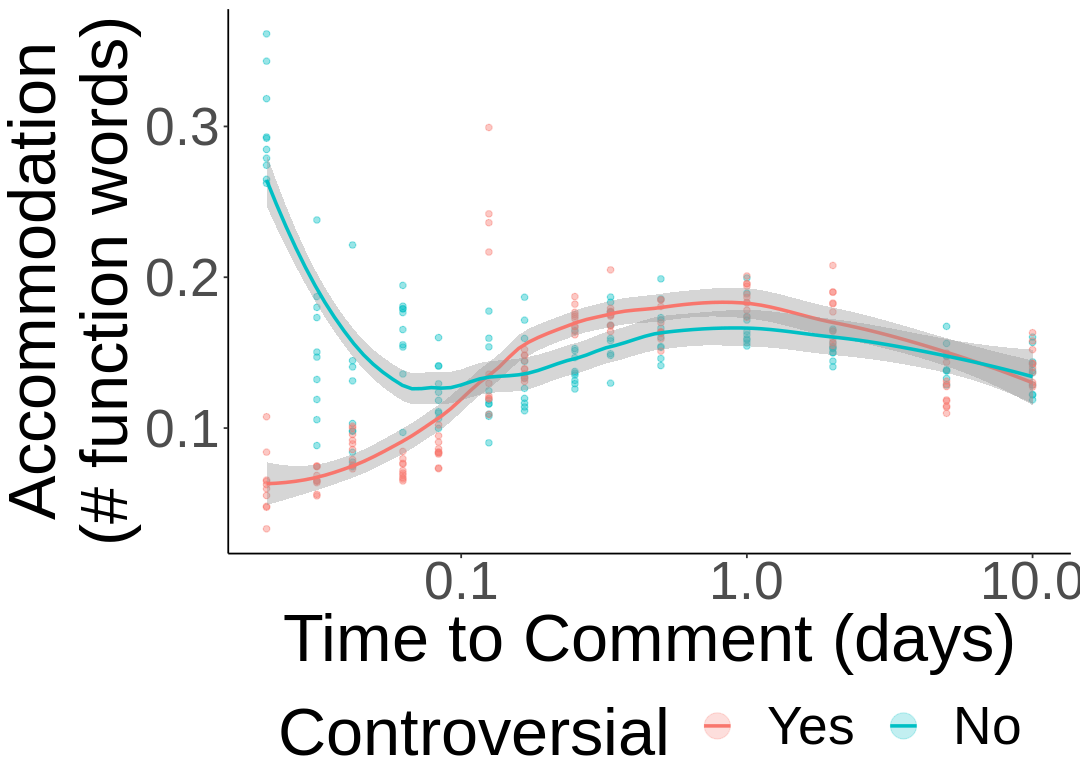

In [54]:
make_lsm_effect_plot(marker='function', cname = cn, vname='time', x_label='Time to Comment (days)',
                     legend_loc='bottom', sp=0.7, 
                     extra_args=scale_x_continuous(trans = 'log10'), plt_h=6.5)


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


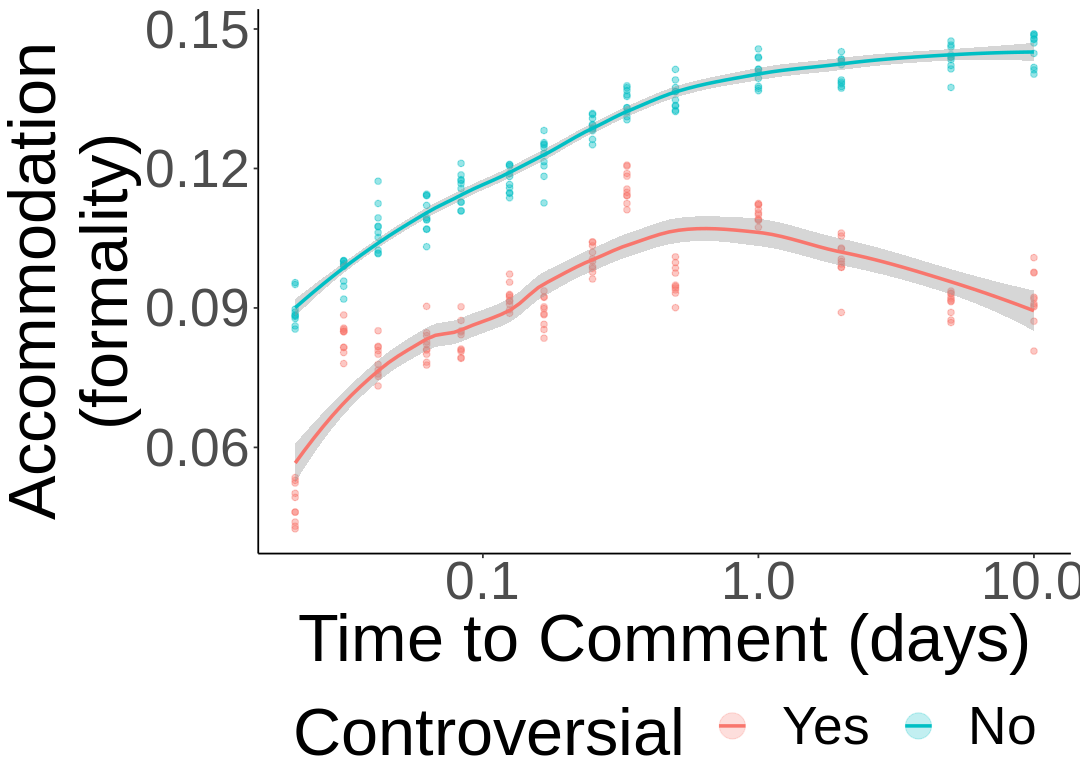

In [64]:
make_lsm_effect_plot(marker='formality', cname = cn, vname='time', x_label='Time to Comment (days)',
                     legend_loc='bottom', sp=0.7, extra_args=scale_x_continuous(trans = 'log10'), plt_h=6.5)

### Figure 5: Depth

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 40 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 40 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”


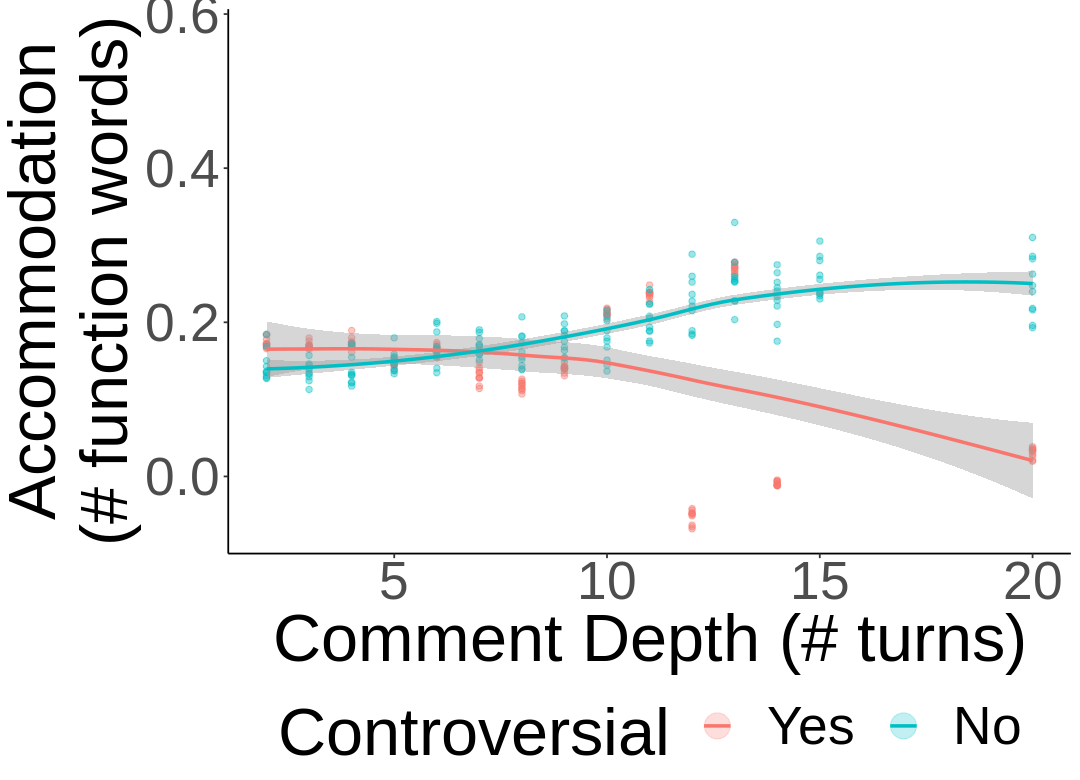

In [91]:
make_lsm_effect_plot(marker='function', cname = cn, vname='depth', x_label='Comment Depth (# turns)',
                     legend_loc='bottom', xlim=c(2,20), plt_h=6.5)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 50 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 50 rows containing missing values (`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 50 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 50 rows containing missing values (`geom_point()`).”


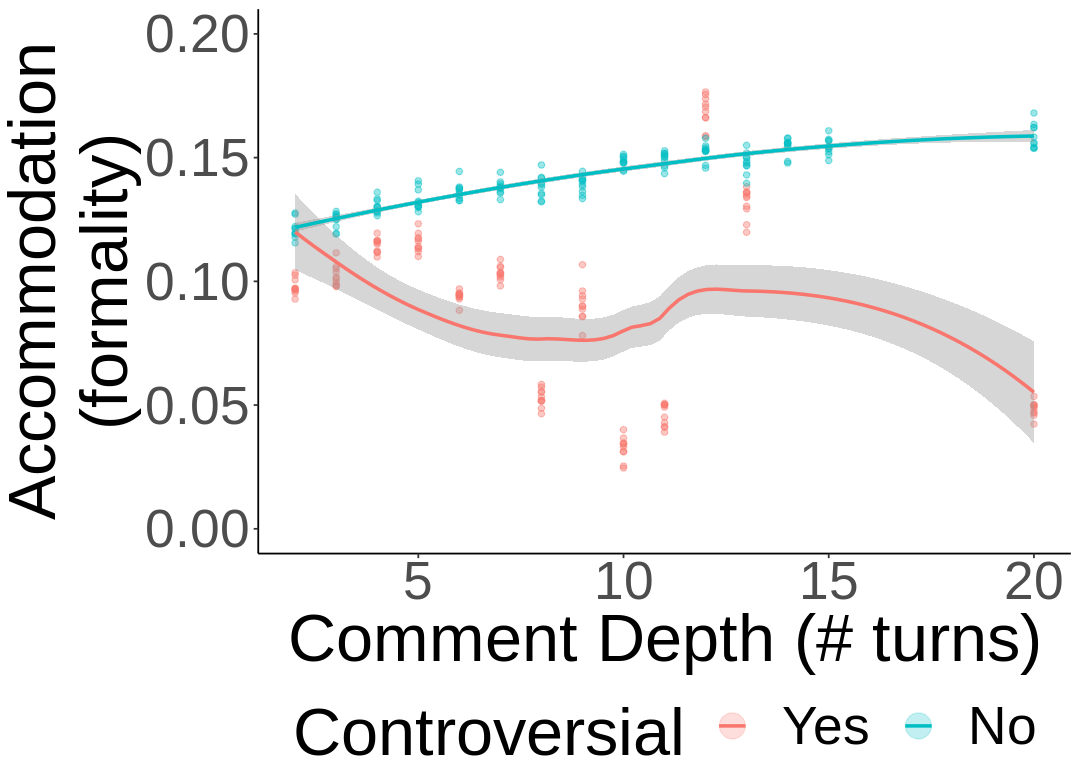

In [90]:
make_lsm_effect_plot(marker='formality', cname = cn, vname='depth', x_label='Comment Depth (# turns)',
                     legend_loc='bottom', xlim=c(2,20), ylim=c(0,0.2), plt_h=6.5)

### Figure 5: Karma

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 93 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 93 rows containing missing values (`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 93 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 93 rows containing missing values (`geom_point()`).”


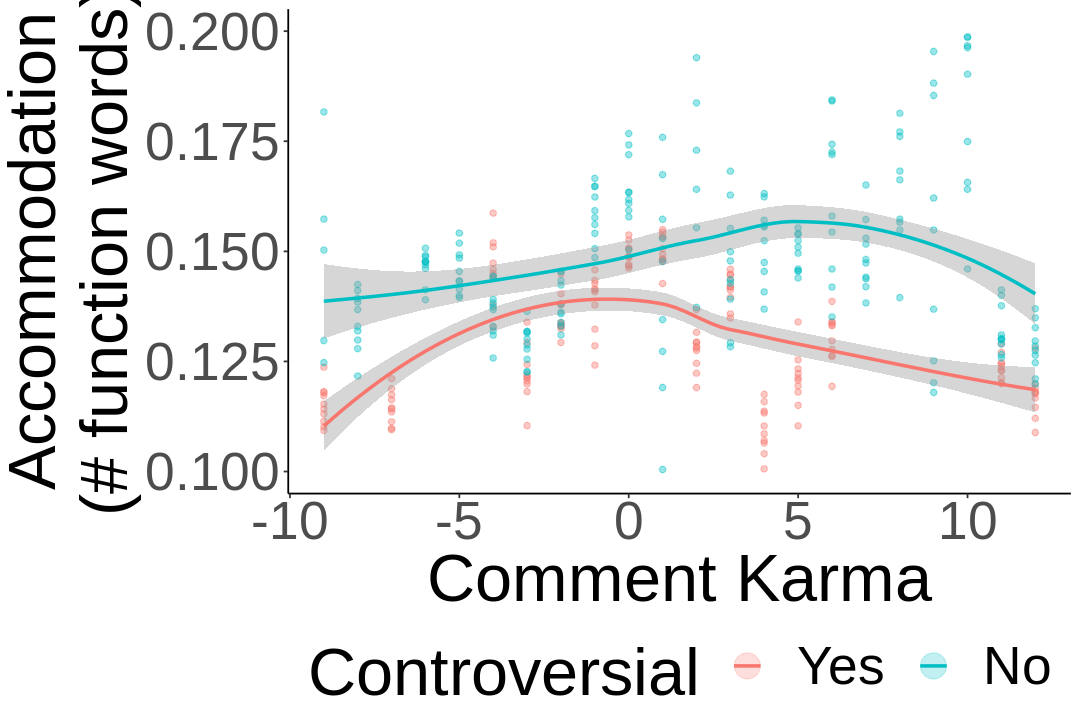

In [36]:
make_lsm_effect_plot(marker='function', cname = cn, vname='karma', x_label='Comment Karma',
                     legend_loc='bottom', ylim=c(0.1,0.22), plt_h=6.5)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


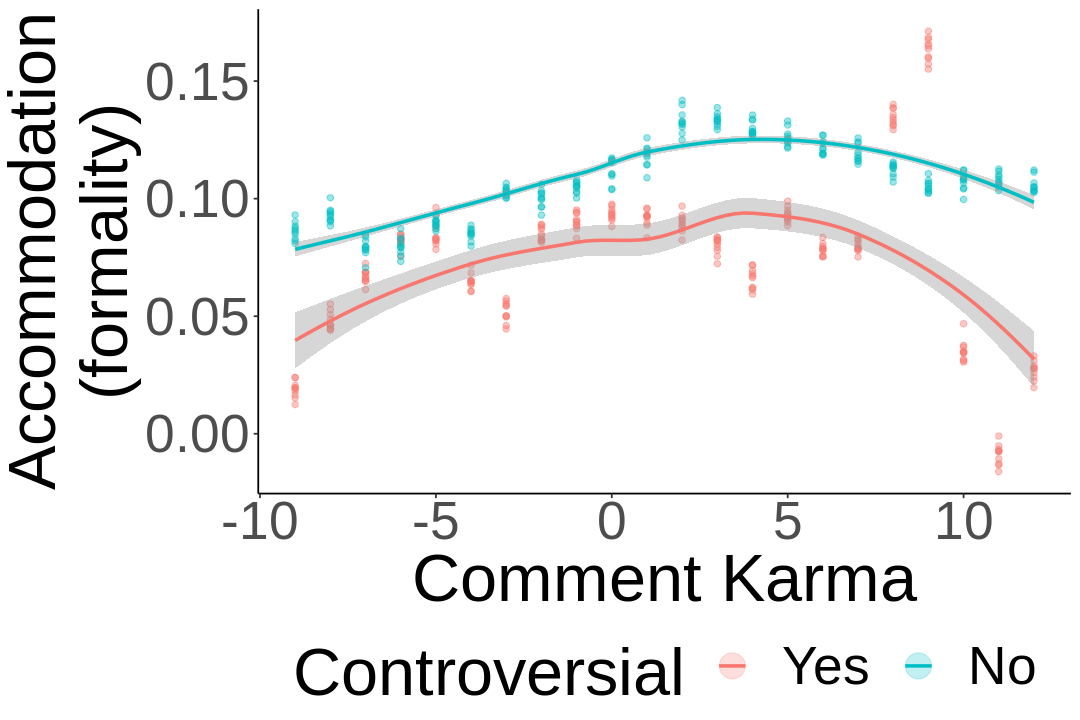

In [40]:
make_lsm_effect_plot(marker='formality', cname = cn, vname='karma', x_label='Comment Karma',
                     legend_loc='bottom', plt_h=6.5)

### Figure 5: Parent Karma

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


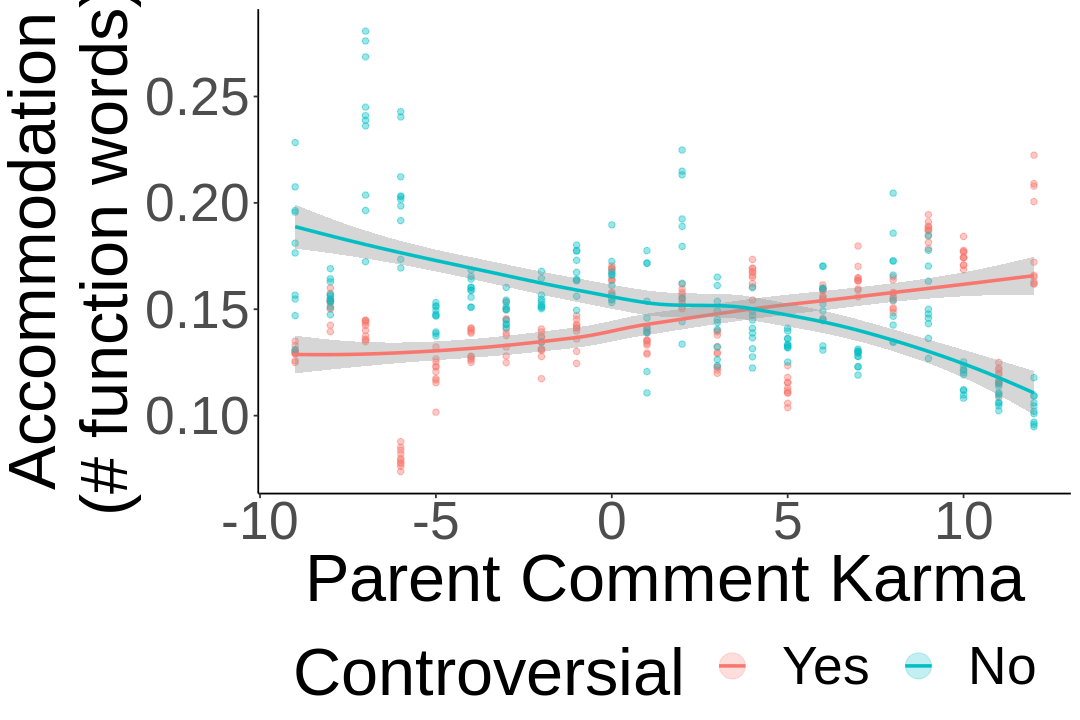

In [56]:
make_lsm_effect_plot(marker='function', cname = cn, vname='parentkarma', x_label='Parent Comment Karma',
                     legend_loc='bottom', plt_h=6.5)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


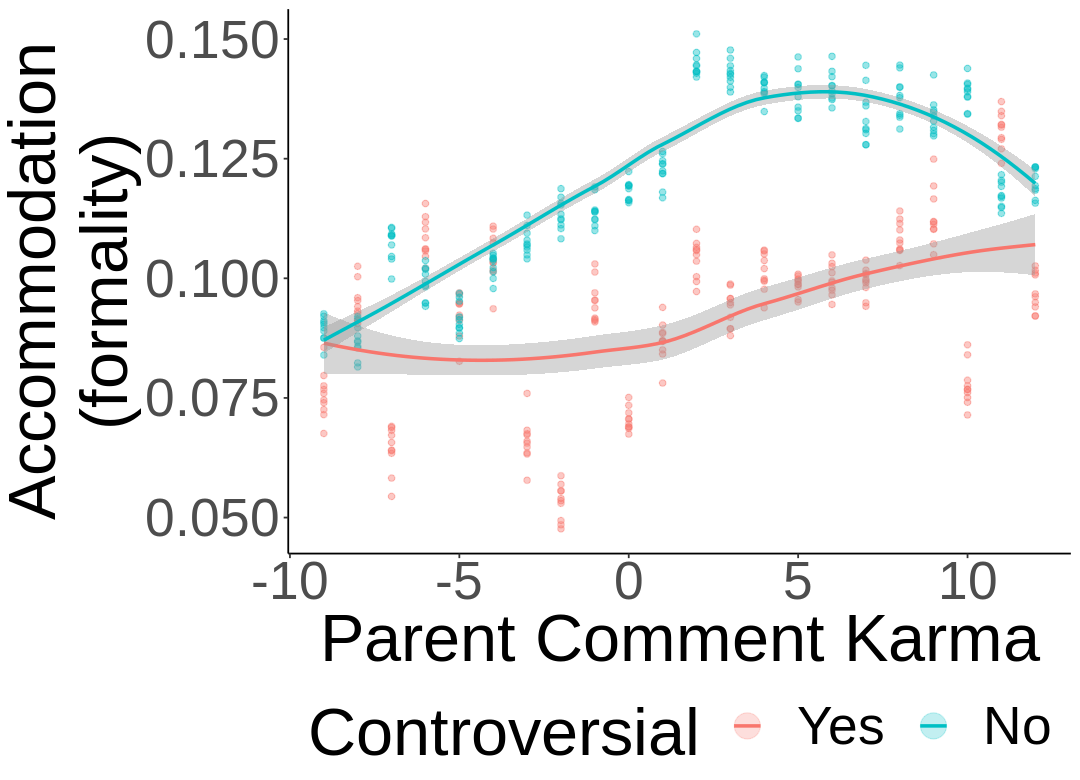

In [63]:
make_lsm_effect_plot(marker='formality', cname = cn, vname='parentkarma', x_label='Parent Comment Karma',
                     legend_loc='bottom', plt_h=6.5)

### Figure 6: Length

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


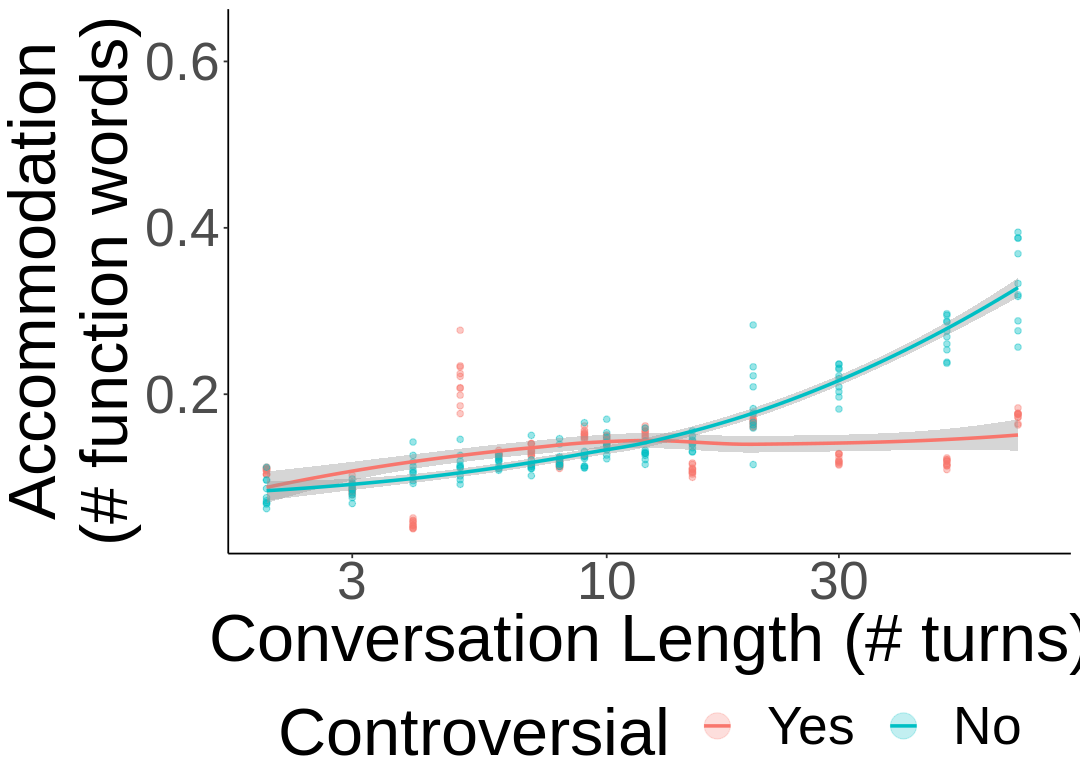

In [84]:
make_lsm_effect_plot(marker='function', cname = cn, vname='length', x_label='Conversation Length (# turns)',
                     legend_loc='bottom', extra_args=scale_x_continuous(trans = 'log10', limits=c(2,75)), plt_h=6.5)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


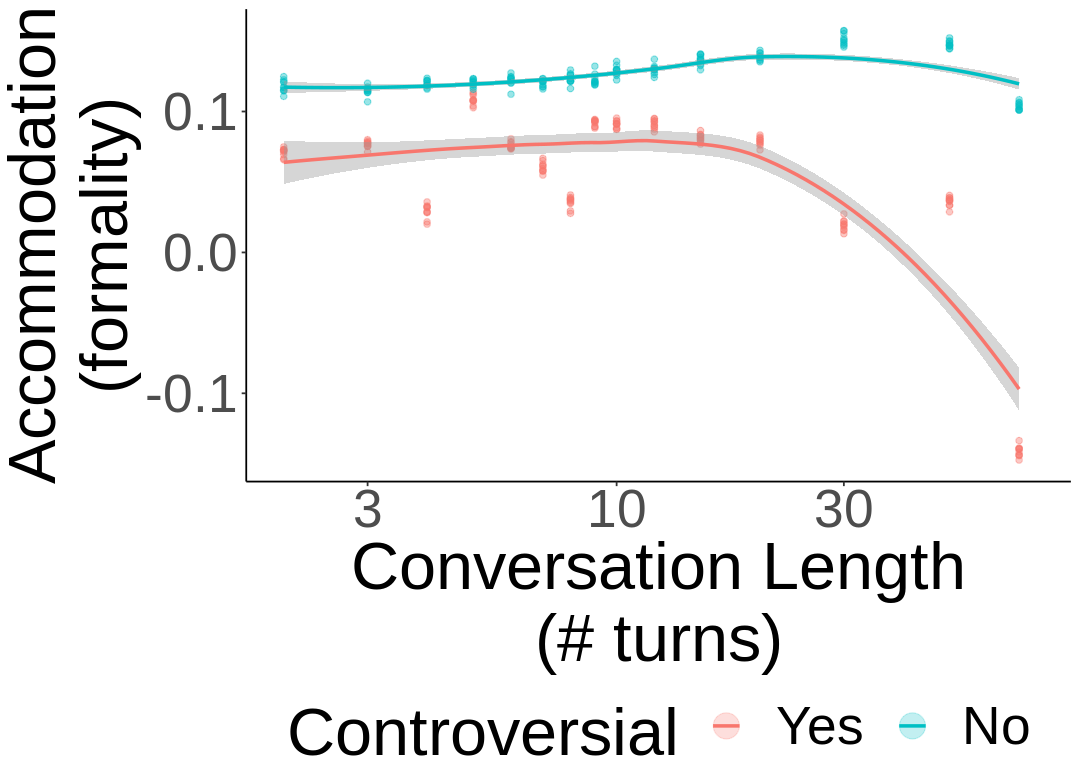

In [83]:
make_lsm_effect_plot(marker='formality', cname = cn, vname='length', x_label='Conversation Length\n(# turns)',
                     legend_loc='bottom', extra_args=scale_x_continuous(trans = 'log10', limits=c(2,75)), plt_h=6.5)

### Figure 7: Tenure

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


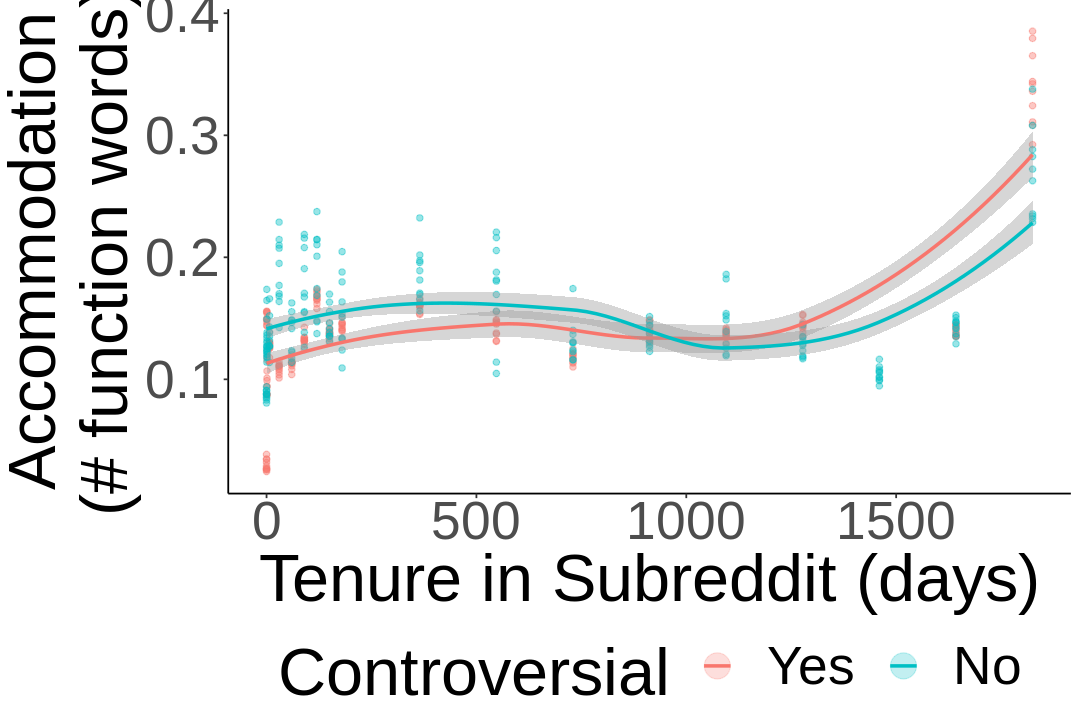

In [49]:
make_lsm_effect_plot(marker='function', cname = cn, vname='tenure', x_label='Tenure in Subreddit (days)',
                     legend_loc='bottom')

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


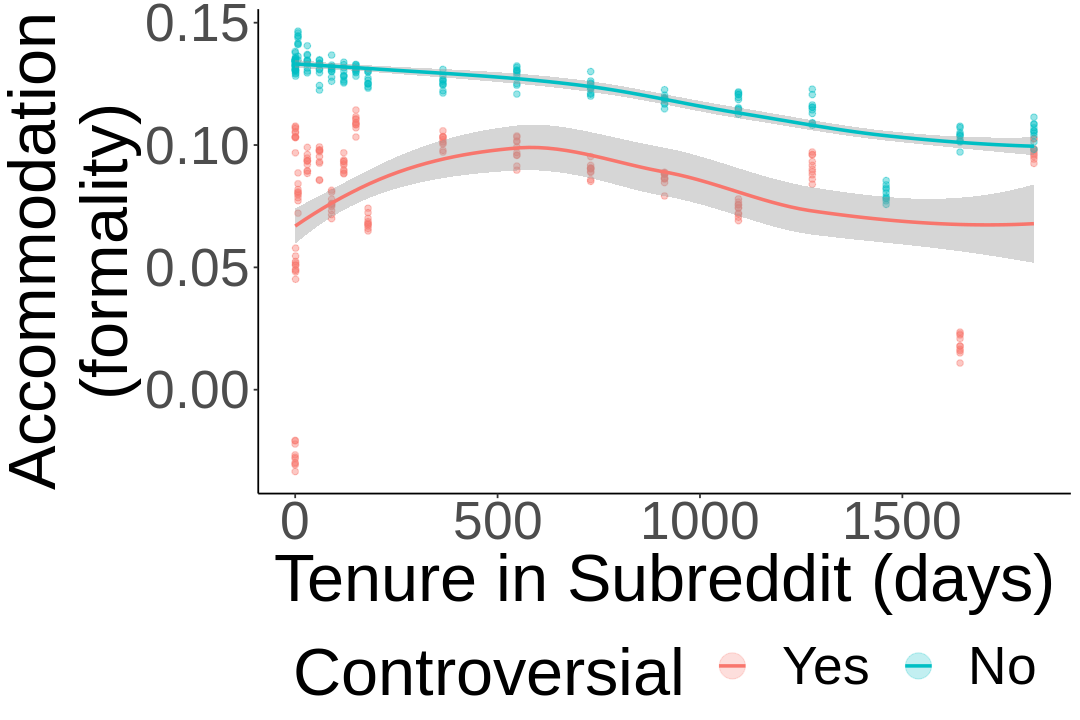

In [65]:
make_lsm_effect_plot(marker='formality', cname = cn, vname='tenure', x_label='Tenure in Subreddit (days)',
                     legend_loc='bottom')

### Figure 7: Subreddit Activity

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 20 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 20 rows containing non-finite values (`stat_smooth()`).”


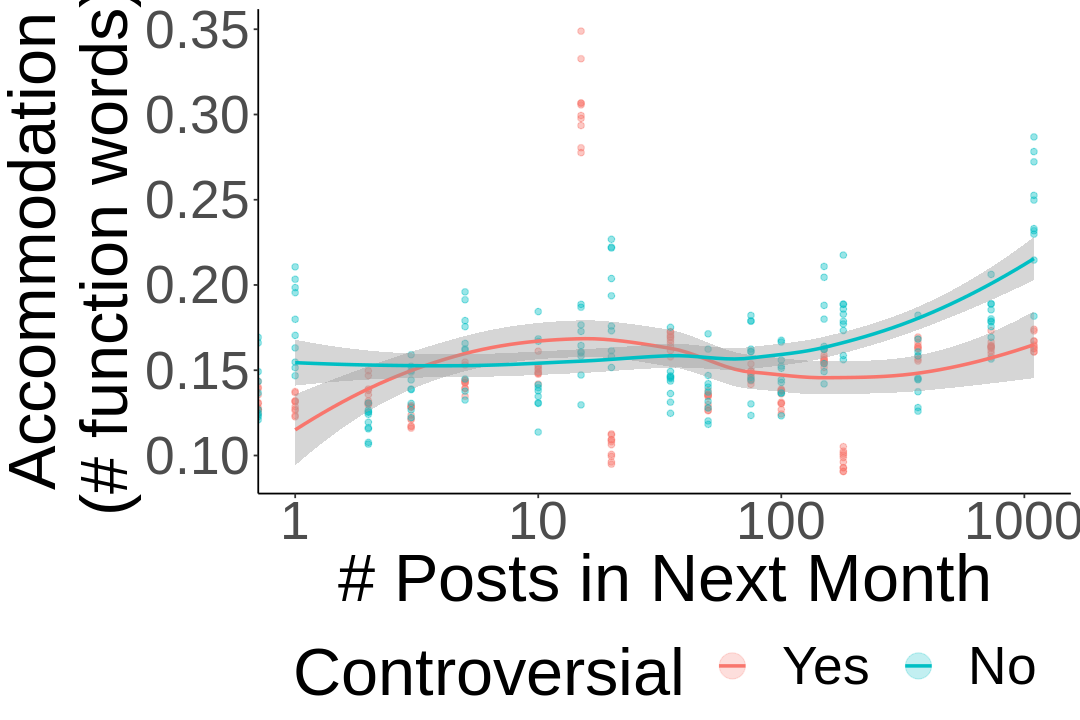

In [68]:
make_lsm_effect_plot(marker='function', cname = cn, vname='sractivity', x_label='# Posts in Next Month',
                     legend_loc='bottom', xlim=c(1,500),  
                     extra_args = scale_x_continuous(trans='log10'))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 60 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 60 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”


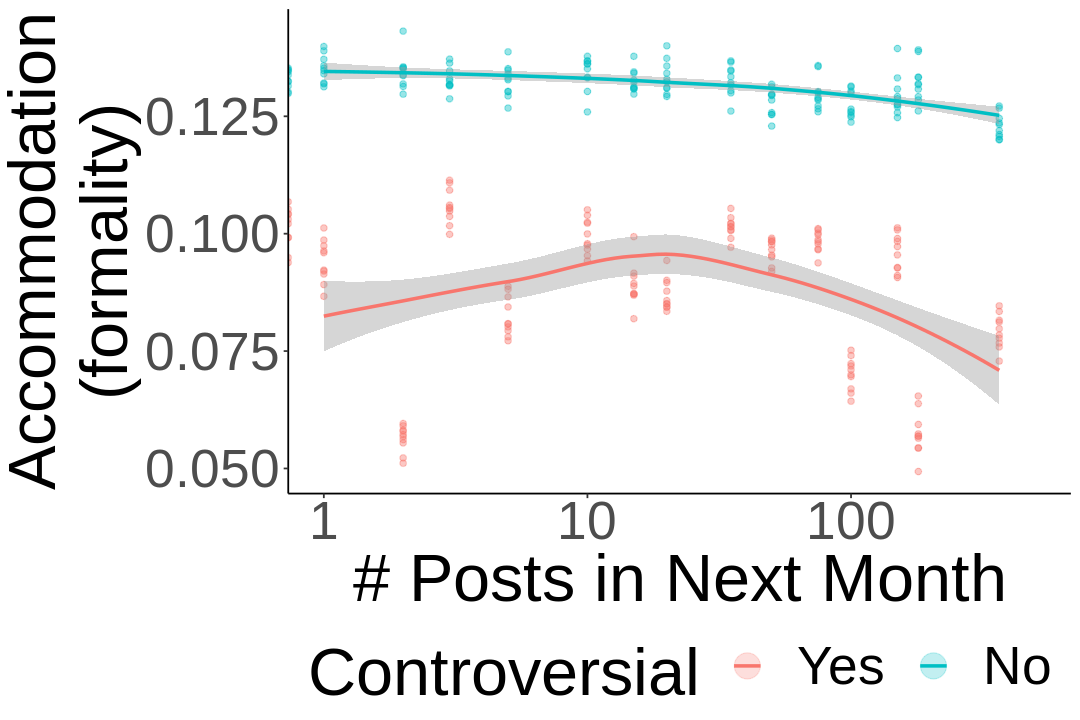

In [67]:
make_lsm_effect_plot(marker='formality', cname = cn, vname='sractivity', x_label='# Posts in Next Month',
                     legend_loc='bottom', xlim=c(1,500), 
                     extra_args = scale_x_continuous(limits=c(1,500), trans='log10'))

### Figure 7: Total Activity

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 60 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 60 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”


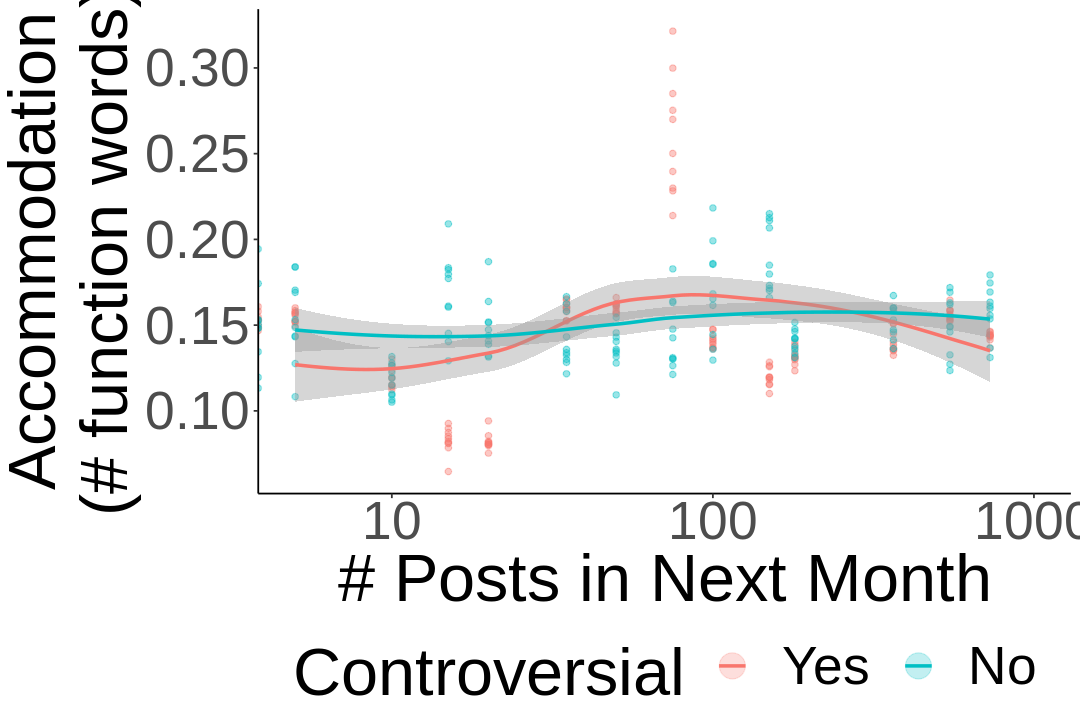

In [69]:
make_lsm_effect_plot(marker='function', cname = cn, vname='totalactivity', x_label='# Posts in Next Month',
                     legend_loc='bottom', xlim=c(5,1000), #ylim=c(0.11,0.18),
                     extra_args = scale_x_continuous(limits=c(5,1000), trans='log10'))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 60 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 60 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”


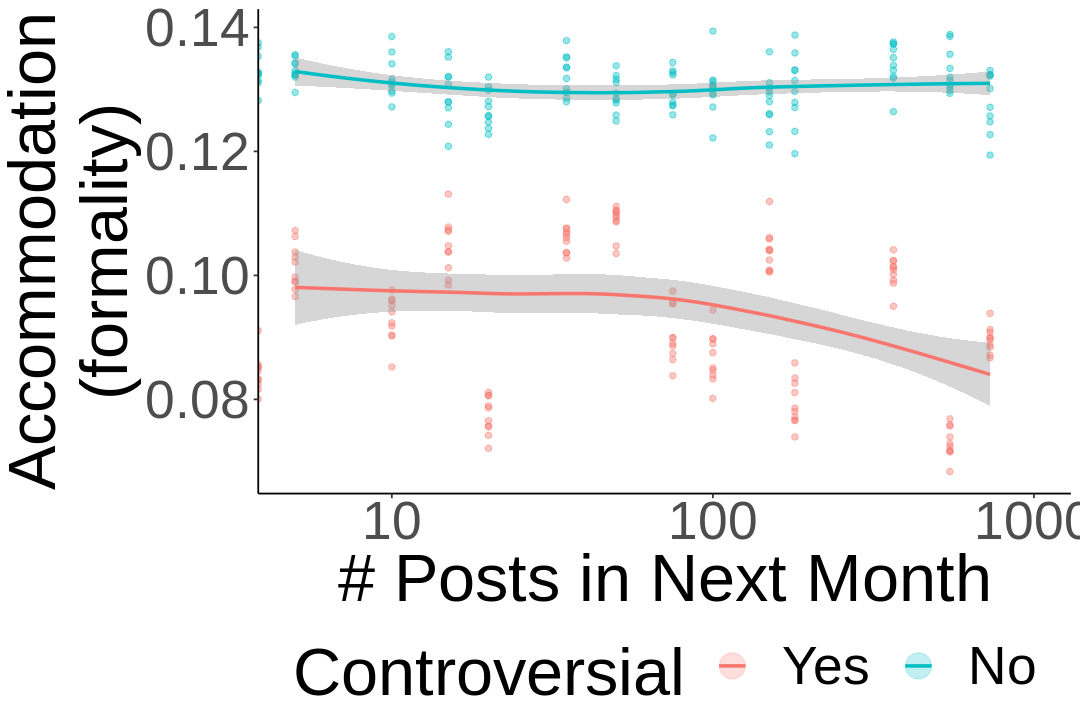

In [70]:
make_lsm_effect_plot(marker='formality', cname = cn, vname='totalactivity', x_label='# Posts in Next Month',
                     legend_loc='bottom', xlim=c(5,1000), 
                     extra_args = scale_x_continuous(limits=c(5,1000), trans='log10'))

# Test Effects

### Figure 2: Time to Comment

In [33]:
summary(readRDS('results/reg_models/function_time_controversy.RDS'))


Correlation matrix not shown by default, as p = 59 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fmla_eff_all
   Data: sub

REML criterion at convergence: -725130.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-49.695  -0.344   0.000   0.368  11.170 

Random effects:
 Groups       Name        Variance  Std.Dev.
 subreddit_re (Intercept) 0.0008234 0.0287  
 Residual                 0.0210707 0.1452  
Number of obs: 718899, groups:  subreddit_re, 21602

Fixed effects:
                                                                     Estimate
(Intercept)                                                        -1.063e-02
parent_style                                                        1.183e-01
category0.03125                                                     4.777e-03
category0.0416666666666667                                          5.770e-03
category0.0625                                                      9.244e-03
category0.0833333333333333                     

In [ ]:
summary(readRDS('results/reg_models/formality_time_controversy.RDS'))

### Figure 5: Depth

In [ ]:
summary(readRDS('results/reg_models/function_depth_controversy.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_depth_controversy.RDS'))

### Figure 5: Karma

In [ ]:
summary(readRDS('results/reg_models/function_karma_controversy.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_karma_controversy.RDS'))

### Figure 5: Parent Karma

In [ ]:
summary(readRDS('results/reg_models/function_parentkarma_controversy.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_parentkarma_controversy.RDS'))

### Figure 6: Length

In [ ]:
summary(readRDS('results/reg_models/function_length_controversy.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_length_controversy.RDS'))

### Figure 7: Tenure

In [ ]:
summary(readRDS('results/reg_models/function_tenure_controversy.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_tenure_controversy.RDS'))

### Figure 7: Subreddit Activity

In [ ]:
summary(readRDS('results/reg_models/function_sractivity_controversy.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_sractivity_controversy.RDS'))

### Figure 7: Total Activity

In [ ]:
summary(readRDS('results/reg_models/function_totalactivity_controversy.RDS'))

In [ ]:
summary(readRDS('results/reg_models/formality_totalactivity_controversy.RDS'))